Rohan Patel, 
QTM 151-3 Final Project 

Introduction:

Formula 1 is an international racing competition, taking place throughout the world.It is widely considered as the pinnicle of racing, and it draws millions of fans annually. Like most other sports, there is a significant debate over its greatest drivers. Through data analysis techniques, we hope to come up with a definitive conclusion about who the greatest Formula 1 driver is. Getting a definitive answer over who may be Formula 1's greatest driver, would be incredibly important for Formula 1 fans, which is what we hope to conclude. 

We hope to compute aggregate and descriptive statistics for driver positions, points, wins,etc. to see which drivers consistently perform at the top. Of course we'd need to subset drivers with a certain number of races, to ensure a large enough sample, to get reliable results. We hope to use joining and data cleaning to get a clean dataset where we can then compute aggregate and descriptive statistics to try and see who the greatest Formula 1 driver truly is. 



Data Description:

We will most likely use only the results and drivers datasets. The results dataset includes the results for every driver in every race from 1950 to the present day. As a result, it has an incredibly large amount of observations/rows, 25,840 to be exact, as each row represent each driver's result in every race. The drivers dataset includes biographical information for every driver who has ever driven in Formula 1. Each observation represents a singular driver in Formula 1's history, and there have been 857 different drivers in its history. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
results = pd.read_csv("/Users/rohanpatel/Documents/GitHub/QTM-151-Notes/final_project 2/data_raw/results.csv")
drivers = pd.read_csv("/Users/rohanpatel/Documents/GitHub/QTM-151-Notes/final_project 2/data_raw/drivers.csv")

# drivers has 857 rows
# results has 25,840 rows

Merging Prodcedures:

The driver names are located in the drivers dataset, while all the race results are located in the results dataset. As a result, we will need to join the two dataset to create a larger dataset which includes all the information we would likely need. So we will need to use the merge function to join them. We will use the specific driverId, forename, and surname columns from drivers as our primary dataset, and use results as our secondary dataset that we will join onto the primary dataset. "driverId" is located in both datasets, so that will be the variable that we join on. Now we have a larger dataset which includes all the results, as well as the driver names. 


In [55]:
results_merged = pd.merge(drivers[["driverId","forename","surname"]],
                          results,
                          on = "driverId",
                          how = "left" )

Data Cleaning

The dataset is generally clean, just some small adjustments are needed to ensure it is in the perfect condition for analysis. The first set of code just combines the forename and surname columns into a new column called driver_name, so we can just query one column to get specific drivers. The second set of code allows us to remove any non-numeric/na values from our position column. In F1, a lot of races end early for drivers because of mechanical failure, driver crashes, etc. Generally, these type of results are due to a mix of car error and driver error and we are not able to discern that, so we will conduct analysis on the defined numerical finishing positions. 

In [56]:
results_merged["driver_name"] = results_merged["forename"] + " " + results_merged["surname"]

results_merged["position"] = pd.to_numeric(results_merged["position"],errors='coerce')
results_merged =results_merged.dropna(subset=["position"])

Main Columns / Aggregation

The main three columns we are using are: driver_name, position, and points. The drive_name column gives us a way to identify the drivers, the position column refers to how they finished in the race, and the points column depicts the F1 points resulting from the position. F1 points are what are used to decide championships and each point allotment corresponds to a position. Then we aggregated the data, and created a new dataframe with the mean points for each driver and the mean finishing position for each driver. The next step is to analyze and visualize this data. 

In [93]:
mean_results_position = (results_merged.groupby("driver_name", as_index = False)
 .agg(mean_position = ("position","mean"),
      count_races = ("position",len),)
 .sort_values(by="mean_position",ascending=True))




mean_results_points = (results_merged.groupby("driver_name",as_index = False)
 .agg(mean_points = ("points","mean"),
      count_races = ("points",len))
 .sort_values(by="mean_points",ascending=False))





# Why are they different??

Results

When we looked at our aggregated statistics, we found that the mean was skewed for certain drivers with a smaller sample of races. To be the greatest athelete in any sport, you need to show your talent over a large enough sample, so we decided to limit the sample to drivers over 150 races finished. Looking at the aggregated data for position, we see that Lewis Hamilton and Michael Schumacher are far ahead of anyone else. However, when we looked at points, Schumacher was farther down the board. After further research, we learned that the F1 points system has changed significantly over the years. As a result, using points to compare drivers across different periods is a disingenous comparison, so we narrowed our focus to just position. Based on the data, it seems that Lewis Hamilton is the greatest Formula 1 driver of all time, but Michael Schumacher is a close second, and everyone else is a decent bit far behind. 

In [94]:
final_results_position = mean_results_position.query("count_races >= 150")
final_results_points = mean_results_points.query("count_races >= 150")

In [87]:
final_results_points


,driver_name,mean_position,count_races
384,Lewis Hamilton,3.383803,284
427,Michael Schumacher,3.701245,241
575,Sebastian Vettel,5.282443,262
123,David Coulthard,5.828402,169
371,Kimi Räikkönen,6.238596,285
180,Fernando Alonso,6.257732,291
627,Valtteri Bottas,6.296089,179
455,Nico Rosberg,6.355932,177
411,Mark Webber,6.600000,160
565,Rubens Barrichello,7.056769,229


In [91]:
final_results_position

,driver_name,mean_position,count_races
384,Lewis Hamilton,3.383803,284
427,Michael Schumacher,3.701245,241
575,Sebastian Vettel,5.282443,262
123,David Coulthard,5.828402,169
371,Kimi Räikkönen,6.238596,285
180,Fernando Alonso,6.257732,291
627,Valtteri Bottas,6.296089,179
455,Nico Rosberg,6.355932,177
411,Mark Webber,6.600000,160
565,Rubens Barrichello,7.056769,229


Text(0.5, 1.0, 'Average Finishing Position for Formula 1 Drivers with at least 150 Races Finished')

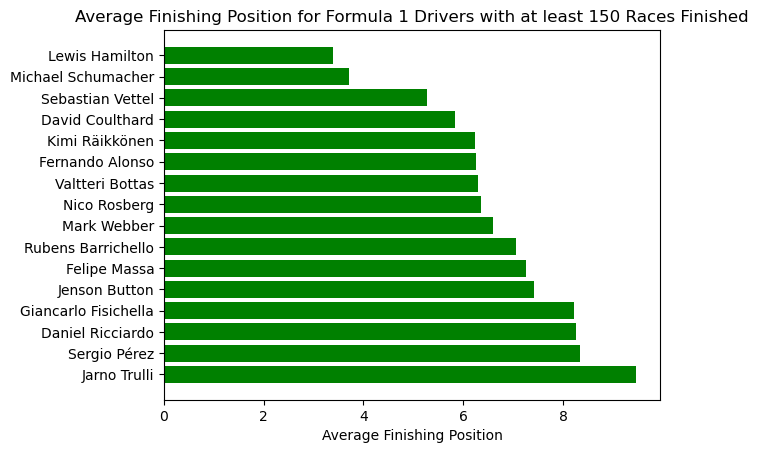

In [89]:
final_results_position_sorted = final_results_position.sort_values("mean_position",ascending=False)



plt.barh(data=final_results_position_sorted,y="driver_name",width="mean_position",color="green")
plt.xlabel("Average Finishing Position")
plt.title("Average Finishing Position for Formula 1 Drivers with at least 150 Races Finished")

Findings

Looking at the data, it was clear that the debate over Formula One's greatest driver came down to two drivers, Lewis Hamilton and Michael Schumacher. Based on our data analysis, it appears that Lewis Hamilton has a slight edge over Schumacher. However, Formula One driver analysis likely goes much farther beyond simply statistics and results, but based on the available data, it seems like Hamilton is Formula One's greatest driver. It was quite impressive to see how much of a gap those two built to the rest of the drivers, which speaks to their unbelievable talent. Through analyzing the data, we learned a lot about Formula One, especially its greatest drivers.